In [1]:
import pandas as pd
import autoviz as at
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud, STOPWORDS

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [4]:
df= pd.read_csv(r"C:\Users\selfk\OneDrive\Desktop\archive (1)\netflix_titles.csv")

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."


In [9]:
#find null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
#null values convert to 0
df1 =df.fillna(0)

In [11]:
df1.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [16]:
df1['country'].value_counts()

country
United States                                             2818
India                                                      972
0                                                          831
United Kingdom                                             419
Japan                                                      245
                                                          ... 
Germany, Canada, United States                               1
Denmark, United Kingdom, South Africa, Sweden, Belgium       1
Serbia, South Korea, Slovenia                                1
United Kingdom, Spain, Belgium                               1
South Africa, United States, Japan                           1
Name: count, Length: 749, dtype: int64

In [17]:
#find type of a series
df1['type'].max()

'TV Show'

In [20]:
df1[df1['country']=="India"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,TV Show,Kota Factory,0,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi, Nassar",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies","When the father of the man she loves insists that his twin sons marry twin sisters, a woman creates an alter ego that might be a bit too convincing."
39,s40,TV Show,Chhota Bheem,0,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil",India,"September 16, 2021",2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman powers leads his friends on exciting adventures to guard their fellow Dholakpur villagers from evil."
50,s51,TV Show,Dharmakshetra,0,"Kashmira Irani, Chandan Anand, Dinesh Mehta, Ankit Arora, Pushkar Goggiaa, Anjali Rana, Aarya DharmChand Kumar, Amit Behl, Maleeka Ghai",India,"September 15, 2021",2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","After the ancient Great War, the god Chitragupta oversees a trial to determine who were the battle's true heroes and villains."
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,0,0,India,"September 15, 2021",2014,TV-G,1 Season,"Docuseries, International TV Shows","Explore the history and flavors of regional Indian cuisine, from traditional Kashmiri feasts to the vegetarian dishes of Gujarat."
...,...,...,...,...,...,...,...,...,...,...,...,...
8773,s8774,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, Atmaram Bhende, Asha Bhende",India,"January 1, 2018",2006,TV-PG,151 min,"Comedies, Dramas, International Movies","Thanks to an arranged marriage that was designed to make an ailing grandmother happy, newlyweds Rahul and Swati are virtually strangers. Can a four-day honeymoon make a difference when it comes to the couple's feelings about each other?"
8775,s8776,TV Show,Yeh Meri Family,0,"Vishesh Bansal, Mona Singh, Akarsh Khurana, Ahan Nirban, Ruhi Khan, Prasad Reddy, Revathi Pillai",India,"August 31, 2018",2018,TV-PG,1 Season,"International TV Shows, TV Comedies","In the summer of 1998, middle child Harshu balances school, family, friendship and other challenges of growing up."
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay Mishra, Anil Rastogi, Ravi Jhankal, Kulbhushan Kharbanda, Ekavali Khanna, Mukesh Tiwari, Vinod Acharya",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political ambitions are sparked when the visiting prime minister mistakenly grants him special security clearance.
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit Patil, Chinmay Mandlekar, Rajesh Shringarpure, Pushkar Shrotri, Tejashree Pradhan, Neha Joshi",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political party sparks bitter conflict and the party's division into two rival factions.


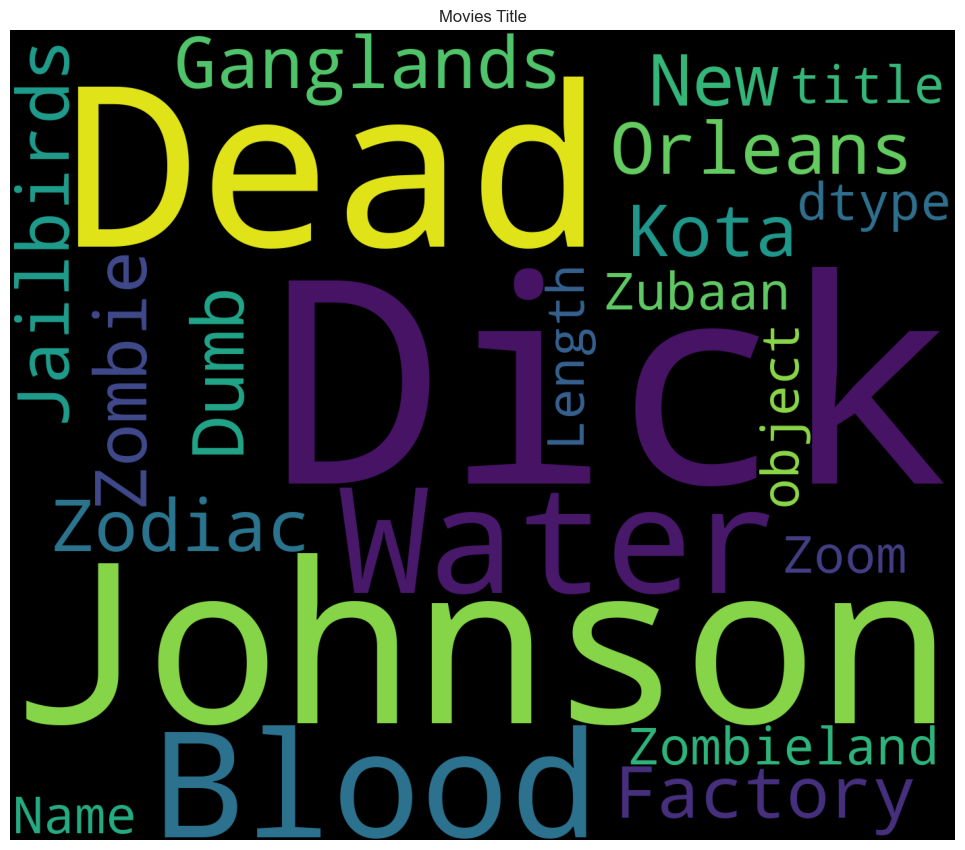

In [23]:
text = (str(df1['title']))
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          max_words=10000,
                          width=1400,
                          height=1200
                         ).generate(text)


plt.imshow(wordcloud)
plt.title('Movies Title')
plt.axis('off')
plt.show()

In [27]:
df1[['title','date_added']].value_counts()

title                          date_added       
최강전사 미니특공대 : 영웅의 탄생            September 1, 2018    1
#Alive                         September 8, 2020    1
#AnneFrank - Parallel Stories  July 1, 2020         1
#FriendButMarried              May 21, 2020         1
#FriendButMarried 2            June 28, 2020        1
                                                   ..
'76                            August 4, 2021       1
#realityhigh                   September 8, 2017    1
#cats_the_mewvie               February 5, 2020     1
#blackAF                       April 17, 2020       1
#Selfie 69                     June 21, 2021        1
Name: count, Length: 8807, dtype: int64

In [29]:
df1['date_added'].value_counts()

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
 June 1, 2018          1
October 21, 2018       1
February 8, 2016       1
June 5, 2018           1
October 14, 2017       1
Name: count, Length: 1768, dtype: int64

In [33]:
df1.groupby('title')['description'].unique()

title
#Alive                              [As a grisly virus rampages a city, a lone man stays locked inside his apartment, digitally cut off from seeking help and desperate to find a way out.]
#AnneFrank - Parallel Stories    [Through her diary, Anne Frank's story is retold alongside those of five Holocaust survivors in this poignant documentary from Oscar winner Helen Mirren.]
#FriendButMarried                [Pining for his high school crush for years, a young man puts up his best efforts to move out of the friend zone until she reveals she's getting married.]
#FriendButMarried 2                     [As Ayu and Ditto finally transition from best friends to newlyweds, a quick pregnancy creates uncertainty for the future of their young marriage.]
#Roxy                                                                                      [A teenage hacker with a huge nose helps a cool kid woo a girl that he’s secretly in love with.]
                                                      